In [3]:
import matplotlib.pyplot as plt
import torch
import os

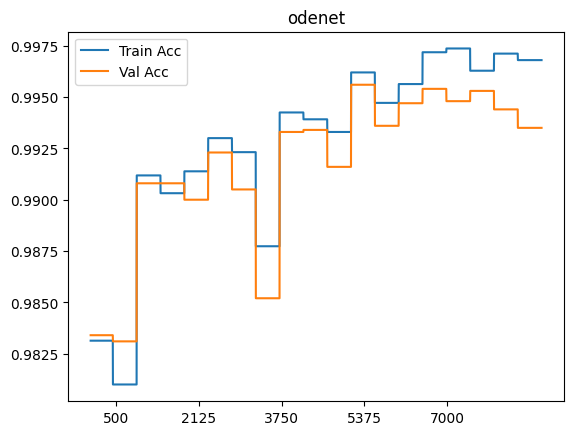

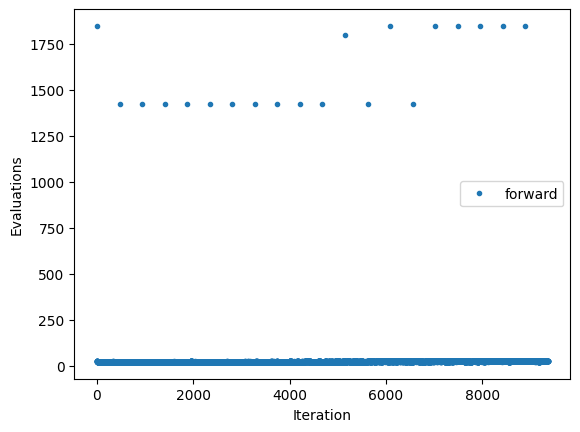

In [6]:
net = 'odenet'
dataset = 'mnist'
adjoint = True
path = '_'.join([net,dataset]) if adjoint == False else '_'.join([net,dataset,'adjoint'])
# time_avg = torch.load(os.path.join(path,'batch_time_meter_avg.pth'))
# time_val = torch.load(os.path.join(path,'batch_time_meter_val.pth'))
train_acc = torch.load(os.path.join(path,'train_acc_hist.pth'))
val_acc = torch.load(os.path.join(path,'val_acc_hist.pth'))
nfe_f = torch.load(os.path.join(path,'nfe_f_hist.pth'))
nfe_b = torch.load(os.path.join(path,'nfe_b_hist.pth'))


# plt.figure()
# plt.plot(time_avg)
# plt.title('batch_time_meter_avg')
# plt.figure()
# plt.plot(time_val)
# plt.title('batch_time_meter_val')

plt.figure()
plt.title(net)
plt.plot(train_acc[500:],label='Train Acc')
plt.plot(val_acc[500:],label='Val Acc')
plt.xticks(torch.linspace(500,7000,5))

# plt.plot(train_acc,label='Train Acc')
# plt.plot(val_acc,label='Val Acc')
# # plt.xticks(torch.linspace(500,9000,5))

plt.legend()
plt.savefig(os.path.join(path,'_'.join(['accs',net,dataset])+'.pdf'))

if adjoint:
    plt.figure()
    plt.plot(nfe_f,'.',label='forward')
    # plt.plot(nfe_b,'.',label='backward')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Evaluations')
    plt.savefig(os.path.join(path, '_'.join(['nfe',net,dataset])+'.pdf'))

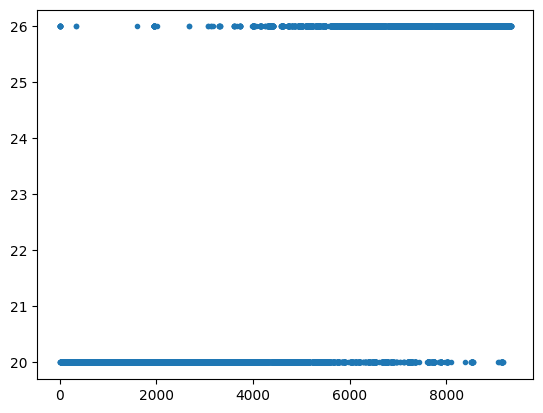

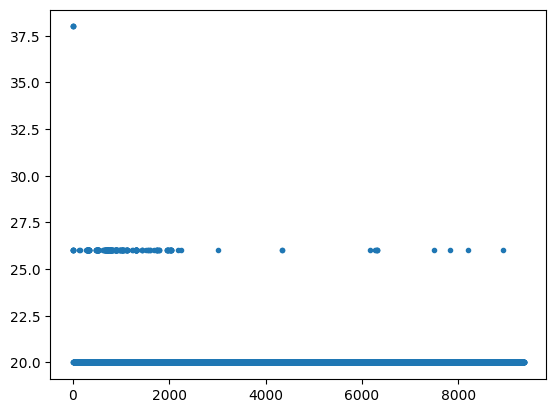

In [33]:
import numpy as np
nfe_f = np.array(nfe_f)
plt.plot(nfe_f[nfe_f<100],'.')
plt.figure()
nfe_b = np.array(nfe_b)
plt.plot(nfe_b[nfe_b<100],'.')